## Red Wine Quality Prediction
* This dataset can be viewed as classification task. 
* The classes are ordered and not balanced 
* We are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
* The wine quality at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

* Goal is to design a Classification model to predict the quality of wine as Good or Not Good


### Importing the libraries and packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

### Importing data set 

In [3]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Visualization

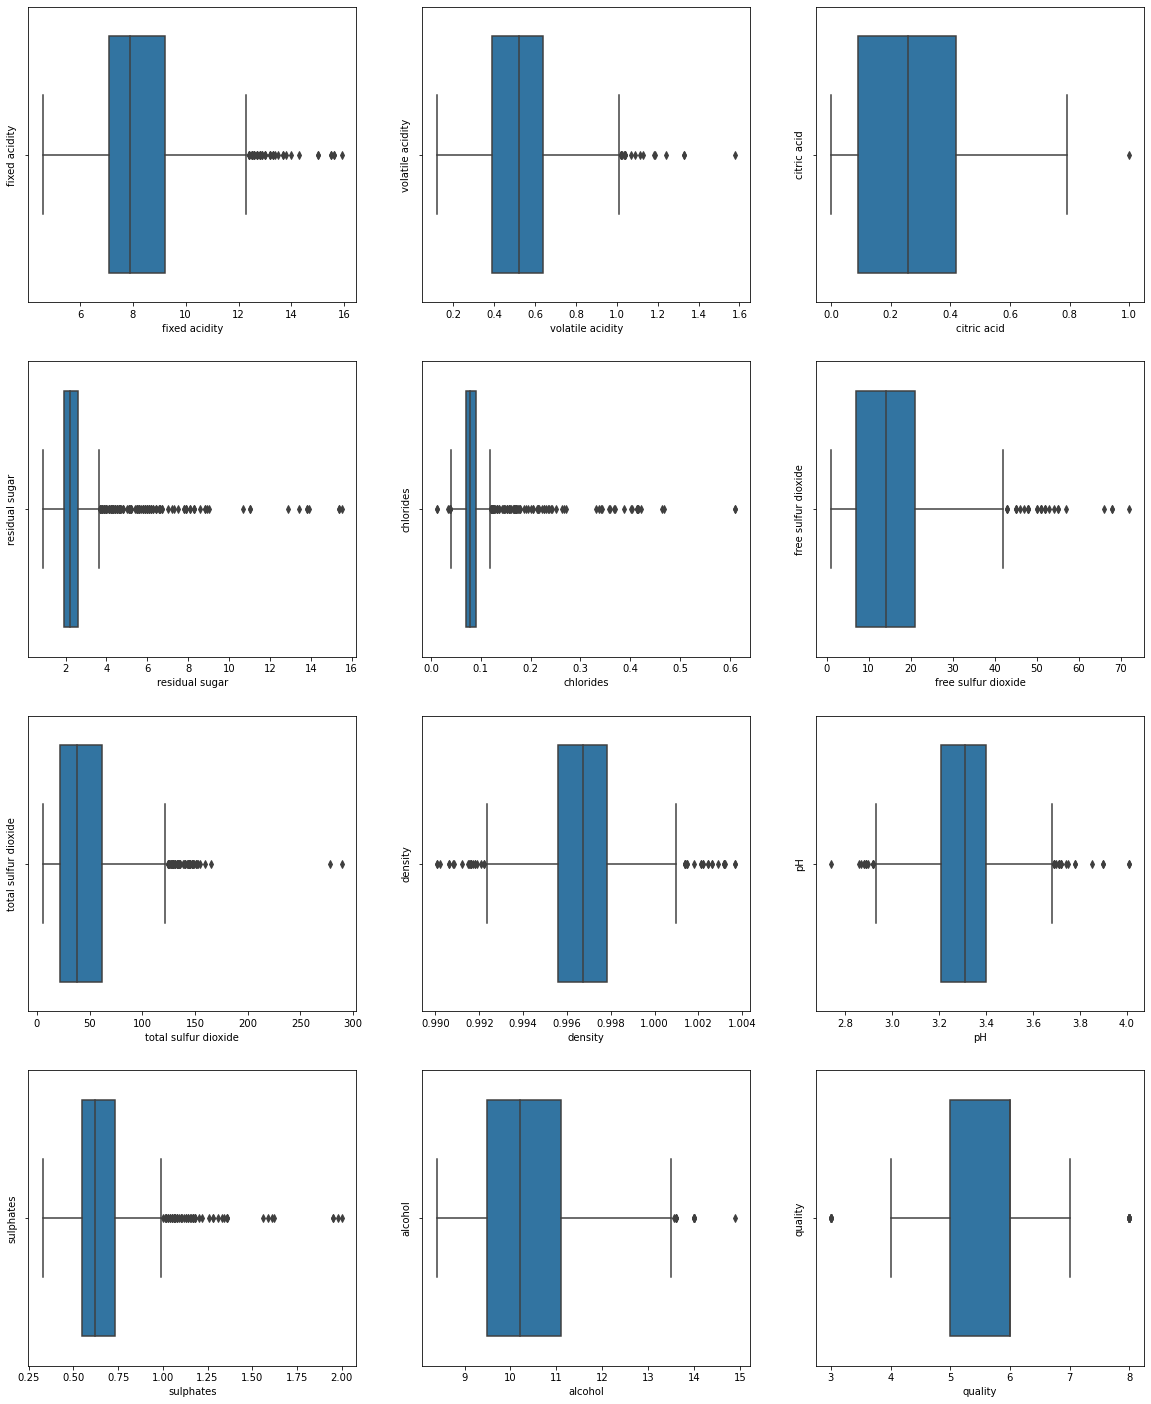

In [9]:
plt.figure(figsize =(20,25))
plt_no=1
for columns in data:
    if plt_no<13:
        ax=plt.subplot(4,3,plt_no)
        sns.boxplot(data[columns],orient ='v')
        plt.ylabel(columns)
    plt_no +=1
plt.show()


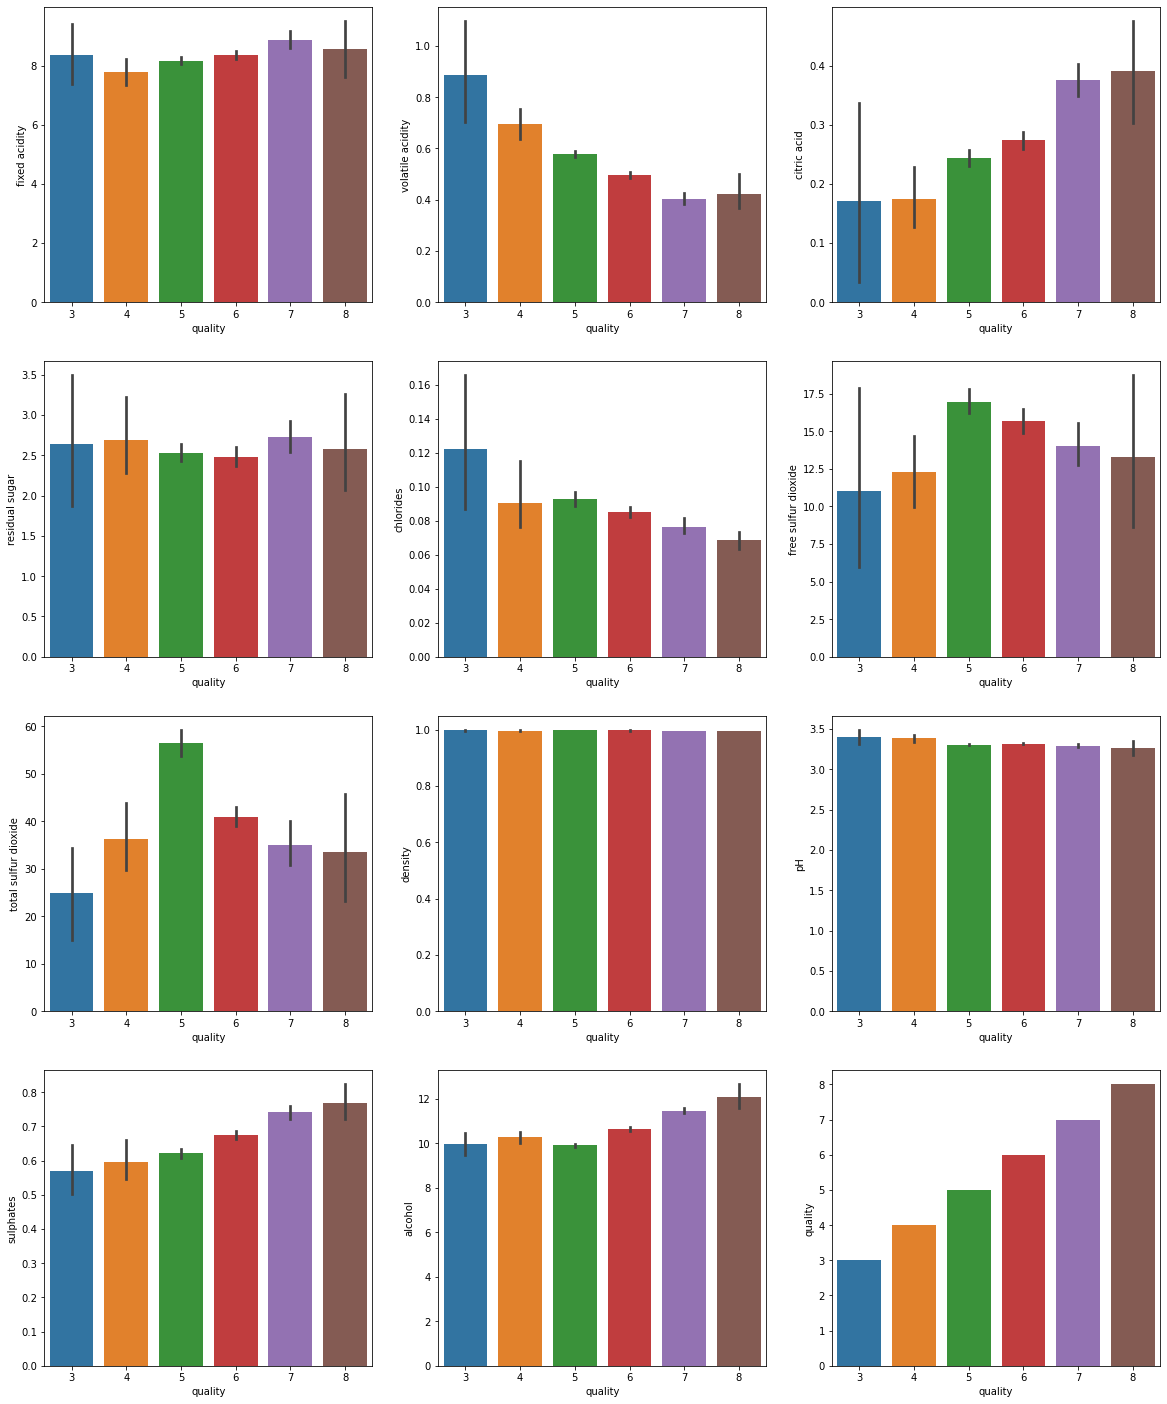

In [10]:
plt.figure(figsize =(20,25))
plt_no=1
for i in data:
    if plt_no<13:
        ax=plt.subplot(4,3,plt_no)
        sns.barplot(data ['quality'],data[i])
        plt.ylabel(i)
        plt.xlabel('quality')
    plt_no +=1
plt.show()


In [11]:
data_corr= data.corr()
data_corr['quality'].sort_values(ascending =False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [ ]:
# Wine quality` has a good correlation with the `volatile acidity` and `alcohol` features

### Checking Correaltion and HEAT MAP Design

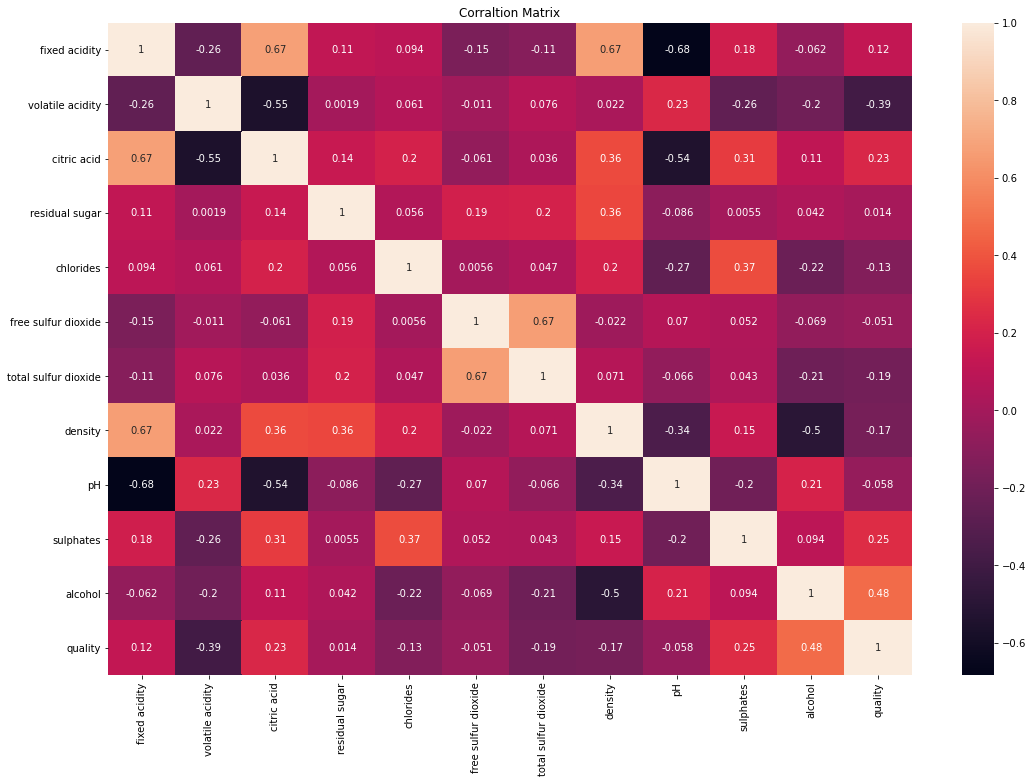

In [12]:
#Checking Correaltion
df_corr= data.corr()
#Plottinh Heat MAP
plt.figure(figsize=[18,12])
sns.heatmap(df_corr,annot=True)
plt.title('Corraltion Matrix')
plt.show()

### Assumptions:
  * 1. The quality of the wine is inversely proportional  the volatile acidity.
  * 2. There is relatively bit more average sugar in the cheapest wine. 
  * 3. The  quality wines have the greater concentration of alcohol.
  * 4. Most of the wines in this dataset are of nof of good quality
  * 5. Data is skewed , unscaled and have outliers

###  Processing outliers in the datset

In [15]:
# finding using IQR

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]



fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


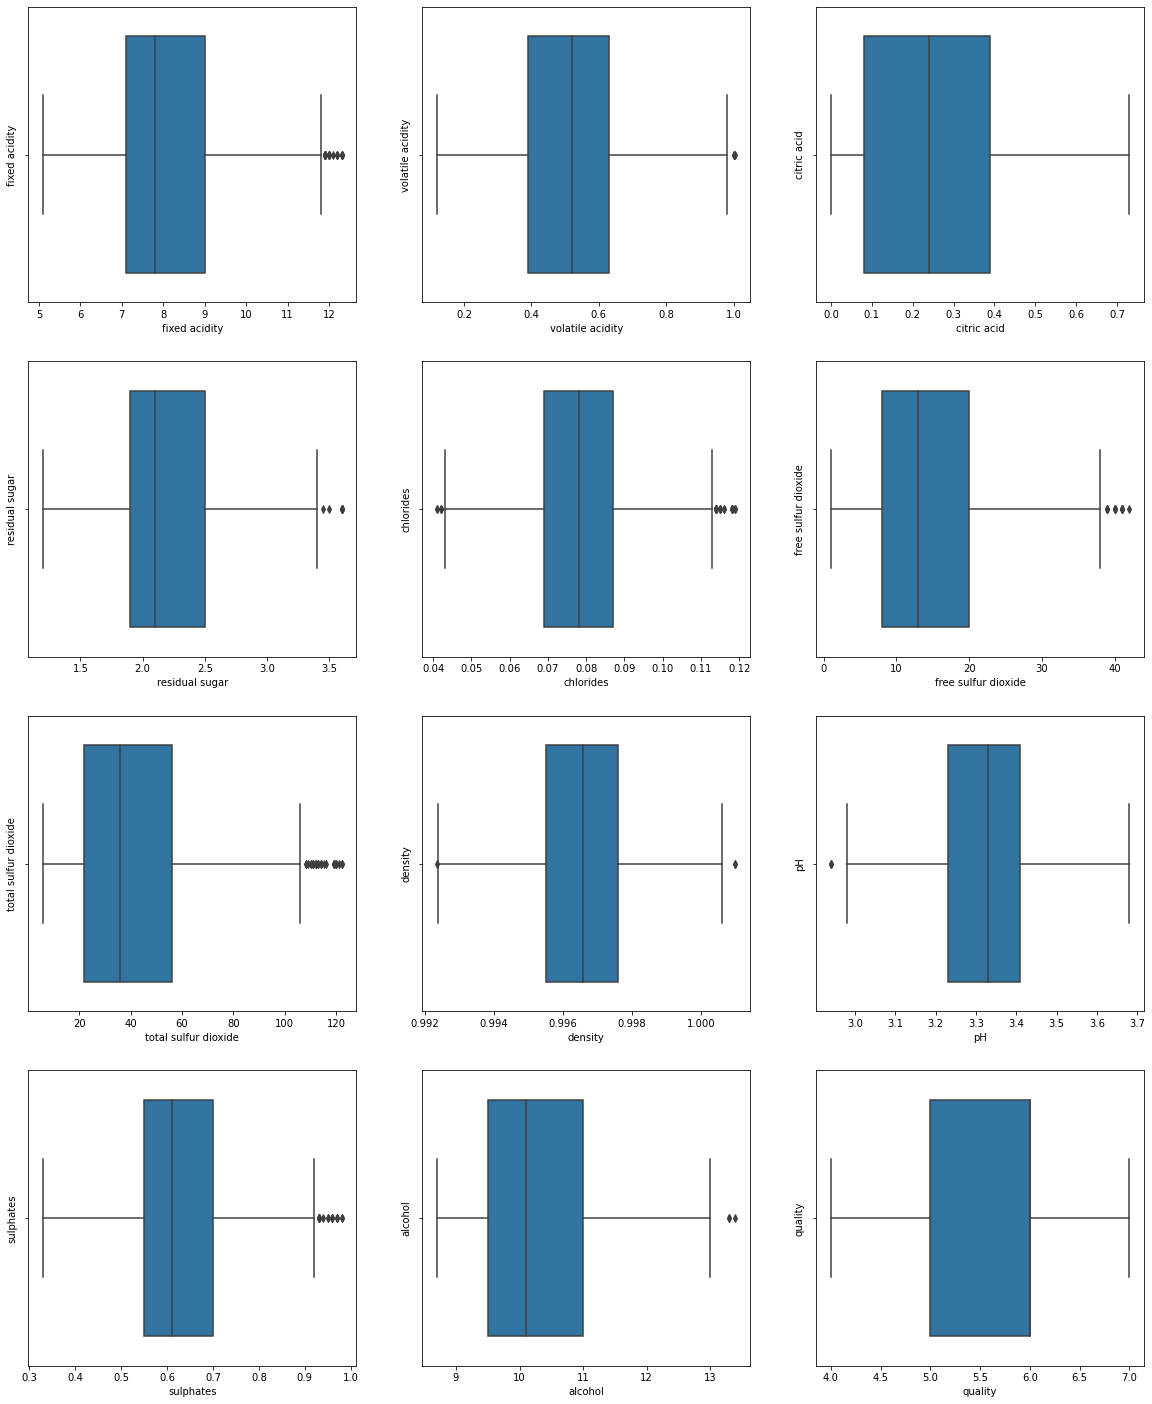

In [16]:
plt.figure(figsize =(20,25))
plt_no=1
for columns in df_iqr:
    if plt_no<13:
        ax=plt.subplot(4,3,plt_no)
        sns.boxplot(df_iqr[columns],orient ='v')
        plt.ylabel(columns)
    plt_no +=1
plt.show()


In [17]:
df_iqr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,8.162002,0.523066,0.246760,2.185411,0.078586,15.020356,42.268024,0.996584,3.324623,0.631264,10.350792,5.623410
std,1.458270,0.164231,0.179441,0.440972,0.014317,8.792916,26.106438,0.001593,0.131731,0.116098,0.963954,0.721248
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995520,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.087000,20.000000,56.000000,0.997600,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,7.000000


In [23]:
# Now if we devide the group as +/-7 then the data set willbe highly imbalanced 
# devideing as GOOD/NOT GOOD ALCHOHOL
df = pd.DataFrame()
wine_quality =[]
qlty = data["quality"].values
for i in qlty :
    if i>= 7 :
        wine_quality.append(1)
    else:
        wine_quality.append(0)
#Adding the column to  dataset
df_cat = pd.DataFrame(data=wine_quality, columns=["wine_quality"])
df = pd.concat([data, df_cat], axis=1)


In [25]:
#Adding the column to  dataset
len(wine_quality)

1599

In [24]:

df.shape

(1599, 13)

In [184]:
df =df.dropna()

In [26]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_quality            0
dtype: int64

In [186]:
df.shape

(855, 13)

In [27]:
data.skew().sort_values(ascending =False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
quality                 0.217802
pH                      0.193683
density                 0.071288
dtype: float64

## Train Test Split 
### Setting X and y axis and splitting the data into train and test respectively.

In [36]:
# Train Test Split 
# Setting X and y axis and splitting the data into train and test respectively.
x = df.drop(['wine_quality','quality'],axis =1)
y = df['wine_quality']

In [37]:
x.skew().sort_values(ascending =False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

In [38]:
x['total sulfur dioxide']= np.log(x['total sulfur dioxide'])
x['free sulfur dioxide']= np.log(x['free sulfur dioxide'])
x['alcohol']= np.log(x['alcohol'])
x['sulphates']= np.log(x['sulphates'])
x['chlorides']= np.log(x['chlorides'])
x['residual sugar']= np.log(x['residual sugar'])

In [39]:
x.skew().sort_values(ascending =False)

residual sugar          1.806864
chlorides               1.745215
fixed acidity           0.982751
sulphates               0.921867
volatile acidity        0.671593
alcohol                 0.661856
citric acid             0.318337
pH                      0.193683
density                 0.071288
total sulfur dioxide   -0.079323
free sulfur dioxide    -0.234031
dtype: float64

In [40]:
x.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

### Finding Best Random state

In [41]:
#Finding Best Random state
from sklearn.linear_model import LogisticRegression
maxaccu =0
rs =0
for i in range(1,100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=i)   
    lr = LogisticRegression()
    lr.fit(xtrain,ytrain)
    predrf =lr.predict(xtest)
    acc= accuracy_score(ytest,predrf)
    if acc>maxaccu :
        maxaccu =acc
        rs=i
rs

87

## Modelling 

In [214]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=87,stratify=y) 

In [62]:
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)
ypred =LR.predict(xtest)
acc_LR= accuracy_score(ytest,ypred)
print('Accuracy_LR',acc_LR)
print('\n Classification Report_LR')
print(classification_report(ytest,ypred))
print('\n Confusion Matrix')
print(confusion_matrix(ytest,ypred))

Accuracy_LR 0.8875

 Classification Report_LR
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       284
           1       0.50      0.19      0.28        36

    accuracy                           0.89       320
   macro avg       0.70      0.58      0.61       320
weighted avg       0.86      0.89      0.86       320


 Confusion Matrix
[[277   7]
 [ 29   7]]


In [61]:
#2 K Nearest neighbour 
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(xtrain,ytrain)
yknn =KNN.predict(xtest)
acc_KNN= accuracy_score(ytest,yknn)
print('Accuracy_KNN',acc_LR)
print('\n Classification Report_KNN')
print(classification_report(ytest,yknn))
print('\n Confusion Matrix')
print(confusion_matrix(ytest,yknn))

Accuracy_KNN 0.8875

 Classification Report_KNN
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       284
           1       0.42      0.28      0.33        36

    accuracy                           0.88       320
   macro avg       0.66      0.61      0.63       320
weighted avg       0.86      0.88      0.86       320


 Confusion Matrix
[[270  14]
 [ 26  10]]


In [60]:
#3 DT 
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xtrain, ytrain)
ydt =DT.predict(xtest)
acc_DT= accuracy_score(ytest,ydt)
print('Accuracy_DT',acc_DT)
print('\n Classification Report_KNN')
print(classification_report(ytest,ydt))
print('\n Confusion Matrix')
print(confusion_matrix(ytest,ydt))

Accuracy_DT 0.89375

 Classification Report_KNN
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       284
           1       0.53      0.44      0.48        36

    accuracy                           0.89       320
   macro avg       0.73      0.70      0.71       320
weighted avg       0.89      0.89      0.89       320


 Confusion Matrix
[[270  14]
 [ 20  16]]


In [59]:
#4 Randon Forest 
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(xtrain,ytrain)
yrf=RF.predict(xtest)
acc_RF= accuracy_score(ytest,yrf)
print('Accuracy_Random_Forest',acc_RF)
print('\n Classification Report_RF')
print(classification_report(ytest,yrf))
print('\n Confusion Matrix')
print(confusion_matrix(ytest,yrf))

Accuracy_Random_Forest 0.9125

 Classification Report_RF
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       284
           1       0.67      0.44      0.53        36

    accuracy                           0.91       320
   macro avg       0.80      0.71      0.74       320
weighted avg       0.90      0.91      0.90       320

[[276   8]
 [ 20  16]]


In [46]:
#Cross Validation 
cvLR =cross_val_score(LR,x,y,cv=7)
cvKNN =cross_val_score(KNN,x,y,cv=7)
cvDT =cross_val_score(DT,x,y,cv=7)
cvRF =cross_val_score(RF,x,y,cv=7)
print ('\n CV score LR',cvLR.mean())
print ('\n CV score KNN',cvKNN.mean())
print ('\n CV score DT',cvDT.mean())
print ('\n CV score RF',cvRF.mean())


 CV score LR 0.87116262271399

 CV score KNN 0.8530496547044467

 CV score DT 0.8374046469886506

 CV score RF 0.8749302295038908


In [47]:
# Model to be Considered 
Accu_Sum =[acc_LR,acc_KNN,acc_DT,acc_RF]
Accu_Sum

[0.8875, 0.875, 0.896875, 0.9125]

In [48]:
CV_Score_sum =[cvLR.mean(),cvKNN.mean(),cvDT.mean(),cvRF.mean()]
CV_Score_sum

[0.87116262271399, 0.8530496547044467, 0.8374046469886506, 0.8749302295038908]

In [49]:
x =[(Accu_Sum[0]-CV_Score_sum[0])*100,(Accu_Sum[1]-CV_Score_sum[1])*100,(Accu_Sum[2]-CV_Score_sum[2])*100,(Accu_Sum[3]-CV_Score_sum[3])*100]
x

[1.6337377286009924, 2.1950345295553286, 5.94703530113494, 3.756977049610921]

### BEST MODEL after considering Cross Validation will be Random Forest as the difference for it model  is lower amongst all

### HyperParaneter Tuning for RANDOM FOREST

In [52]:
from sklearn.model_selection import GridSearchCV
parameters ={'n_estimators':[200,700],
            'max_features': ['auto','log2'],
            'max_depth':[4,6,8],
            'criterion' : ['gini']}

In [63]:
GSV = GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GSV.fit(xtrain,ytrain)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 700]})

In [64]:
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 700}

## RESEDIGING THE MODEL WITH RECOMENDED PARAMETERS by GridSearchCV

In [65]:
from sklearn.ensemble import RandomForestClassifier

RF_MOD = RandomForestClassifier(criterion='gini',
 max_depth= 6,
 max_features= 'auto',
 n_estimators= 700)
RF_MOD.fit(xtrain,ytrain)
yrf_tuned=RF_MOD.predict(xtest)
acc_RF_MOD= accuracy_score(ytest,yrf_tuned)
print('Accuracy_Random_Forest_HYpertuned',acc_RF_MOD)
print('\n Classification Report_RF_MOD')
print(classification_report(ytest,yrf_tuned))
print(confusion_matrix(ytest,yrf_tuned))

Accuracy_Random_Forest_HYpertuned 0.903125

 Classification Report_RF_MOD
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       284
           1       0.61      0.39      0.47        36

    accuracy                           0.90       320
   macro avg       0.77      0.68      0.71       320
weighted avg       0.89      0.90      0.89       320

[[275   9]
 [ 22  14]]


In [55]:
#HyperParaneter Tuning for Logistic Regression 

c_space = np.logspace(-5, 8, 15)

pararm_lr ={'C': c_space,
'class_weight' :['dict' or 'balanced'],
'multi_class' :['auto', 'ovr']}
GSV_LR = GridSearchCV(LogisticRegression(),pararm_lr,cv=7)
GSV_LR.fit(xtrain,ytrain)


GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'class_weight': ['dict'],
                         'multi_class': ['auto', 'ovr']})

In [56]:
GSV_LR.best_params_

{'C': 1389495.494373136, 'class_weight': 'dict', 'multi_class': 'auto'}

In [57]:
from sklearn.linear_model import LogisticRegression
LR_Tuned = LogisticRegression(C = 1389495.494373136, class_weight= 'dict', multi_class= 'auto')
LR_Tuned.fit(xtrain,ytrain)
y_LR_Tuned =LR_Tuned.predict(xtest)
acc_LR_Tuned= accuracy_score(ytest,y_LR_Tuned)
print('Accuracy_LR_Tuned',acc_LR_Tuned)
print('\n Classification Report_LR_Tuned')
print(classification_report(ytest,y_LR_Tuned))
print('\n Confusion Matrix Report_LR_Tuned')
print(confusion_matrix(ytest,y_LR_Tuned))

Accuracy_LR_Tuned 0.896875

 Classification Report_LR_Tuned
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       284
           1       0.58      0.31      0.40        36

    accuracy                           0.90       320
   macro avg       0.75      0.64      0.67       320
weighted avg       0.88      0.90      0.88       320


 Confusion Matrix Report_LR_Tuned
[[276   8]
 [ 25  11]]


#### AOC CURVE  

In [66]:
# AOC CURVE 
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve


In [69]:
roc_auc_score(ytest,y_LR_Tuned)


0.6386932707355243

In [70]:
roc_auc_score(ytest,yrf_tuned)


0.6785993740219092

In [71]:
roc_auc_score(ytest,yrf)


0.7081377151799687

In [72]:
roc_auc_score(ytest,ydt)


0.6975743348982786

In [73]:
roc_auc_score(ytest,yknn)


0.6142410015649451

In [74]:
roc_auc_score(ytest,ypred)

0.5848982785602505

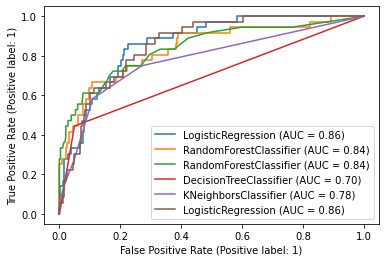

In [78]:
disp = plot_roc_curve(LR_Tuned,xtest,ytest)
disp = plot_roc_curve(RF_MOD,xtest,ytest,ax=disp.ax_)
disp = plot_roc_curve(RF,xtest,ytest,ax=disp.ax_)
disp = plot_roc_curve(DT,xtest,ytest,ax=disp.ax_)
disp = plot_roc_curve(KNN,xtest,ytest,ax=disp.ax_)
disp = plot_roc_curve(LR,xtest,ytest,ax=disp.ax_)
plt.show()

In [79]:
#Saving Model 
import joblib
joblib.dump(LR_Tuned,'Red_Wine_Quality_Prediction_Class.pk1')


['Red_Wine_Quality_Prediction_Class.pk1']

In [80]:
#LOAD and RUN 
RED_WINE =joblib.load('Red_Wine_Quality_Prediction_Class.pk1')
RED_WINE_Results = RED_WINE.predict(xtest)